In [1]:
from tensorflow.keras.datasets import mnist


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


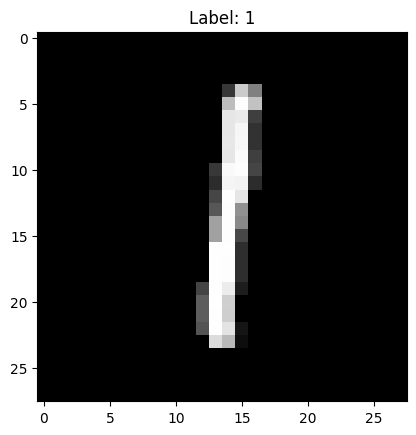

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5500], cmap='gray')
plt.title(f"Label: {y_train[5500]}")
plt.show()


In [6]:
import numpy as np

# Extract the image and label
image = X_train[3]
label = y_train[3]

# Print all 28x28 pixel values neatly
np.set_printoptions(threshold=np.inf, linewidth=120)
print(image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127 251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  68 236 251 21

In [7]:

# CNN expects 4D input → (num_samples, height, width, channels).
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [12]:
print("After scaling (rows 10–19 of image 0):")
print(X_train[0, 10:20, :, 0])


After scaling (rows 10–19 of image 0):
[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.05490196
  0.00392157 0.60392157 0.99215686 0.35294118 0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.54509804 0.99215686 0.74509804 0.00784314 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.04313725 0.74509804 0.99215686 0.2745098  0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [15]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [16]:
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 34s 35ms/step - accuracy: 0.9220 - loss: 0.2564 - val_accuracy: 0.9843 - val_loss: 0.0532
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.9739 - loss: 0.0879 - val_accuracy: 0.9878 - val_loss: 0.0426
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.9815 - loss: 0.0611 - val_accuracy: 0.9890 - val_loss: 0.0373
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.9844 - loss: 0.0529 - val_accuracy: 0.9880 - val_loss: 0.0385
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9867 - loss: 0.0438 - val_accuracy: 0.9915 - val_loss: 0.0352


In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9910 - loss: 0.0279
Test Accuracy: 0.9909999966621399


In [18]:
model.save('mnist_cnn_model.h5')
